# Pipeline


- data preprocessing
- down size the dataset to 15k
- manually label 5k data (testing set)
- autolabel the rest of the 10k (training set)

- keywords labeling
- zero-shot approach
- balance data using undersampling
- fine tune sentiment

# Data Loading and Preprocessing

Importation of libraries

To initiate the text preprocessing pipeline, the computing environment must be configured with specific linguistic tools and data structures. This section loads the dataset and initiate the preprocessing of the data.

`!pip install emoji` - this command install the emoji library. This ensures that the emojis are handled in this code.

`import pandas as pd` - this code imports the Pandas library. This is used for the data manipulation. The Pandas library is named as `pd`. This provides the DataFrame structure, which allows the system to organize unstructured text data into readable rows and columns, making it easier to filter and manipulate.

`import re` - this imports the Regular Expressions module. The `re` library is used for identifying complex character patterns with strings. In this context, this is important for cleaning the data, such as locating and removing specific elements like URLs, messy punctuations, or special characters that do not contribute to the meaning of the text.

`import nltk`, `import emoji` - these codes activate the core NLP toolkits.

The `nltk` (Natural Language Toolkit) is the master framework used for linguistic analysis, containing the logic for how human grammar and syntax work. The emoji library is the specific tool loaded to interpret graphic symbols, allowing the script to either translate emojis into text or remove them entirely.

`from nltk.corpus import stopwords`, `from nltk.tokenize import word_tokenize`, `from nltk.stem import WordNetLemmatizer` - these are modules imported from the NLTK for text cleaning.

The `stopwords` module provides access to lists of high-frequency, low-semantic words (such as "the," "is," or "and") that are typically filtered out to reduce noise.

The `word_tokenize` is responsible for converting raw text strings into individual linguistic units (token).

The `WordNetLemmatizer` is a morphological analyzer that reduces words to their base or dictionary form (e.g., converting "running" to "run"), ensuring that different variations of a word are treated as the same entity.

`from google.colab import files`, `import io` - this code provides the utilities for file handling in the cloud.

The `nltk.download` function retrieves specific resources that the NLTK tools require to operate. Without these download, the tokenizer and lemmatizer would lack the reference materials needed to process the text.

In [ ]:
# Install required library for emoji removal
!pip install emoji

# ----------------- 1. SETUP AND IMPORTS -----------------
import pandas as pd
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import files
import io

# Download NLTK resources needed for text processing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True) #

True

Data Loading

This section handles the crucial step of bringing your raw data from local machine and structuring it for processing.

`print("Please upload your CSV file.")` - this simply displays a prompt in the output cell. This line provides a clear instruction guiding the user on the next action required to proceed with the data loading process.

`uploaded = files.upload()` - this initiates the file upload function. This command triggers a browser-level dialogue box, which allows the user to select and upload the desired CSV file from their local computer. The uploaded file is temporarily stored in memory as a dictionary-like object, where the key is the filename and the value is the file's content (as bytes).

`file_name = list(uploaded.keys())[0]` - this automatically extracts the filename.

Since the uploaded object is a dictionary containing the file(s) that were just uploaded, this line accesses the first key, which is the exact filename. This is necessary for referencing the data in the next step.

`df = pd.read_csv(io.BytesIO(uploaded[file_name]))` - this reads the uploaded file into a DataFrame.

This is the core data processing command. It uses the Pandas `pd.read_csv` function to interpret the data. However, since the file is still in memory (as bytes), it first uses `io.BytesIO` to treat the byte data (`uploaded[file_name]`) as a file stream, allowing Pandas to read and convert it into a structured DataFrame named `df`.

`print(f"\nSuccessfully loaded {file_name}. Total rows: {len(df)}")` - this confirms the successful load. This line provides essential feedback to the user. It prints a confirmation message, including the name of the file loaded and the total number of rows (`len(df)`) found, allowing for an immediate check on data integrity and size.

`df.head()` - this displays the first few rows of the data. This final line prints the header and the first five rows of the newly created DataFrame (df). This provides an instant visual inspection to ensure the data was loaded correctly, headers are recognized, and the content looks as expected.

In [ ]:
# ----------------- 2. LOAD DATA -----------------
# Upload your CSV file
print("Please upload your CSV file.")
uploaded = files.upload()

# Automatically get the filename and read it into a pandas DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\nSuccessfully loaded {file_name}. Total rows: {len(df)}")
df.head()

Please upload your CSV file.


Saving training_data_10000.csv to training_data_10000 (2).csv

Successfully loaded training_data_10000 (2).csv. Total rows: 10000


,text,createdAt,cleaned_text
0,Siguro nag iisip na as of now ang buwayang tam...,2025-05-13 01:40:38+00:00,siguro nag iisip na ang buwayang tamba kung pa...
1,"@233065312833299 @657135544506590 Si ante oh, ...",2025-02-12 01:25:36+00:00,si ante oh kasi ginalingan bumoto kuda ka tulo...
2,@156144332157376 Nagagalit sa BINI because of ...,2025-05-09 07:00:18+00:00,nagagalit sa bini kahit hindi naman sila yong ...
3,@631224103016220 Nawa sa susunod na Halalan ay...,2025-05-13 02:20:17+00:00,nawa sa susunod na halalan ay muli po kayong l...
4,"Ang angas mo, Bulacan—1 si Bam, 4 si Kiko, 11 ...",2025-05-12 16:28:10+00:00,ang angas mo bulacan1 si bam si kiko 11 si hei...


Initiate Data Filtering

This section is dedicated to cleaning of the dataset. It cleans the loaded DataFrame by removing unnecessary columns and application of filters to exclude the unnecessary and irrelevant data. This ensures that the dataset is focused on the target.

Dropping Unwanted Columns

`columns_to_drop` this defines the columns that should be deleted. This creates a list that contains the columns that are considered to be irrelevant for the analysis.

`df.drop(columns=columns_to_drop, inplace=True, errors='ignore')` - this executes the column removal.

The `inplace=True argument modifies the original DataFrame directly, and errors='ignore'` ensures the code doesn't crash if one of the listed columns is already missing.

`print(f"\nDropped unnecessary columns. Remaining columns: {list(df.columns)}")` - this confirms the action. This code print the remaining columns.

`df['createdAt'] = pd.to_datetime(df['createdAt'])` - this standardizes the date format.

Before performing any date-based filtering, this command ensures the `createdAt` column, which likely contains the timestamp of the text, is converted from a simple text string into a recognized datetime object using Pandas' `pd.to_datetime()`. This allows the data to be manipulated based on its year, month, or time.

`df = df[df['createdAt'].dt.year != 2024].reset_index(drop=True)` - this filters out data from 2024.

This is the core filtering logic. It creates a boolean mask that keeps only the rows where the year component `(.dt.year)` of the `createdAt` timestamp is not equal to (`!=`) 2024. The .reset_index(`drop=True`) command cleans up the DataFrame by re-indexing the remaining rows sequentially.

`print(f"Rows after filtering out 2024 data: {len(df)}")` - this reports the result of the temporal filter.

This provides an updated row count after the 2024 data has been excluded, helping the user track the reduction in dataset size.

`Keyword Filtering (Content Specific)`


`keywords` - this defines a comprehensive list of exclusion terms.

This creates a large list of specific keywords, names, and slang phrases related to the Pinoy Big Brother (PBB) show. The goal is to identify and remove all content related to this topic, assuming the intended analysis focuses on something else.

`pattern = r"\b(?:" + "|".join(re.escape(k) for k in keywords) + r")\b"` - this compiles the keywords into a single RegEx pattern.

The `re` library is used to dynamically construct one robust Regular Expression (RegEx) pattern.

- `"|"`: Acts as an 'OR' operator, matching any keyword in the list.

- `r"\b...\b"`: Ensures that only whole words are matched (e.g., matching "kuya" but not part of "kuyapo").

- `re.escape(k)`: Handles special characters within the keywords themselves.

`keep_mask = ~df['text'].astype(str).str.contains(pattern, case=False, regex=True, na=False)` - this creates the exclusion mask.

This line applies the compiled RegEx pattern to the entire text column.

- `.str.contains`: Checks if the text contains any of the keywords defined in the pattern.

- `case=False`: Ensures the match is case-insensitive (matching "KuYa" or "kuya").

- `~`: The tilde (NOT) operator flips the resulting boolean series, creating a keep_mask that selects rows where the keywords were NOT found.

`df_filtered = df[keep_mask].reset_index(drop=True)` - this applies the mask and finalizes the filtering.

The DataFrame `df` is filtered using the keep_mask, creating a new, cleaner DataFrame called `df_filtered` that only contains rows unrelated to the PBB keywords.

`print(f"Rows after PBB keyword filtering: {len(df_filtered)}")` - this reports the final dataset size.

This prints the final, confirmed number of rows in the cleaned dataset after the content-specific filtering has been completed.

In [ ]:
# ----------------- 3. INITIAL DATA FILTERING -----------------

# Drop unwanted columns
columns_to_drop = [
    'pseudo_id', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount',
    'bookmarkCount', 'lang', 'isReply', 'pseudo_conversationId',
    'pseudo_inReplyToUsername', 'pseudo_author_userName', 'author_isBlueVerified'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(f"\nDropped unnecessary columns. Remaining columns: {list(df.columns)}")


# Filter out data from the year 2024
print(f"\nRows before filtering out 2024 data: {len(df)}")
# First, ensure 'createdAt' is a proper datetime object
df['createdAt'] = pd.to_datetime(df['createdAt'])
# Keep only the rows where the year is NOT 2024
df = df[df['createdAt'].dt.year != 2024].reset_index(drop=True)
print(f"Rows after filtering out 2024 data: {len(df)}")


# Filter out rows containing "Pinoy Big Brother" related keywords
keywords = [
    # general show terms (english / tagalog / taglish)
    "pinoy big brother", "pbb", "pinoy bigbrother", "big brother",
    "pinoy big brother celebrity edition", "celebrity edition", "celeb edition",
    "bahay ni kuya", "bahay ni kuya", "kuya", "housemate", "housemates",
    "evict", "evicted", "eviction", "nomination", "nominate", "vote",
    "salubong", "tnt", "task", "weekend update", "pbb updates",
    "tb", "pbb celeb", "pbb celebrity", "pbb collab", "pbb collab edition",
    # taglish/tagalog phrases often used by viewers
    "sino aalis", "sino na evict", "alis na", "bottle", "laban", "barangay",
    "tumangay", "kuya angel", "kuya kuya", "ulo", "talo", "pbb house", "bahay",
    # many celebrity housemate names (add or remove as needed)
    # recent/commonly mentioned names pulled from public lists (example):
    "brent manalo","mika salmanca","ralph de leon","will ashley","ashley ortega",
    "ac bonifacio","klarisse de guzman","vince maristela","dustin yu","charlie fleming",
    "josh ford","michael sager","kira balinger","esnyr ranollo","river joseph",
    "shuvee etrata","bianca de vera","az martinez","dustin","kira","mika","brent",
    "ralph","will","ashley","charlie","vince","josh","michael","river",
    # older / classic celebrity edition names (common ones viewers might mention)
    "keanna reeves","john prats","martin nievera","sharon cuneta","ivana alawi",
    "donny pangilinan","gabbi garcia","melai cantiveros","kim chiu","enchanting dee",
    # slang / short forms and hashtags
    "pbbph", "#pbb", "#pbbceleb", "#pbbcelebcollab", "buhay ni kuya", "team kuya"
]

pattern = r"\b(?:" + "|".join(re.escape(k) for k in keywords) + r")\b"
keep_mask = ~df['text'].astype(str).str.contains(pattern, case=False, regex=True, na=False)
df_filtered = df[keep_mask].reset_index(drop=True)
print(f"\nRows before PBB keyword filtering: {len(df)}")
print(f"Rows after PBB keyword filtering: {len(df_filtered)}")


Dropped unnecessary columns. Remaining columns: ['text', 'createdAt', 'cleaned_text']

Rows before filtering out 2024 data: 10000
Rows after filtering out 2024 data: 10000

Rows before PBB keyword filtering: 10000
Rows after PBB keyword filtering: 10000


Data Sampling and Splitting

This section is dedicated to preparing the final dataset for model training and evaluation. It ensures that even if the available data is very large, a manageable and consistent subset is selected, and then cleanly partitioned into separate training and testing datasets.

`total_filtered_rows = len(df_filtered)` - this calculates the total available data size. This line determines the number of rows remaining in the DataFrame (`df_filtered`) after all previous cleaning and filtering steps have been applied. This count is used to verify that enough data exists for the next step.

`sample_size = 15000` - this sets the size of the total subset. This variable defines the size of the target for the dataset that will be used for the entire model.

`train_size = 10000` - this specifies the training set size. This variable sets the specific number of rows intended to be used for training the model, in this case, 10,000 rows.

`test_size = 5000` - this specifies the testing set size. This variable defines the number of rows intended to be reserved for evaluating the model's performance on unseen data, which is 5,000 rows. Note that `train_size` + `test_size` = `sample_size`.

if `total_filtered_rows >= sample_size`: - this checks for sufficient data.

This conditional statement acts as a safety check. The code inside the if block will only execute if the total number of cleaned rows is greater than or equal to the required `sample_size` (15,000).

`print(f"\nTaking a random sample of {sample_size} rows...")` - this provides execution feedback. If the check passes, this line informs the user that the sampling process is beginning.

`df_sample = df_filtered.sample(n=sample_size, random_state=42)` - this creates a reproducible random sample. The `.sample()` method selects a random subset of 15,000 rows from `df_filtered`. The crucial `random_state=42` ensures that every time the code runs, the exact same set of rows is selected, making the experiment reproducible.

`df_training = df_sample.iloc[:train_size].copy()` - this creates the training set.

This uses the `.iloc` (integer location) method to select the first 10,000 rows of the newly created random sample (`df_sample`). These rows form the `df_training set`. The `.copy()` method is used to ensure the new DataFrame is independent and changes to it won't affect the original sample.

`df_testing = df_sample.iloc[train_size:].copy()` - this creates the testing set. This selects the remaining rows of the sample (from the 10,000th index onward, or 5,000 rows) to create the independent df_testing set, which will be used to evaluate the model's performance.

`else:` - this handles insufficient data. If the initial safety check fails (for example, less than 15,000 rows are available), the else block executes. It prints an error message and initializes empty DataFrames (`pd.DataFrame()`) for `df_training` and `df_testing` to prevent subsequent code sections from failing due to missing data structures.

In [ ]:
# ----------------- 4. SAMPLING AND SPLITTING -----------------
total_filtered_rows = len(df_filtered)
sample_size = 15000
train_size = 10000
test_size = 5000

if total_filtered_rows >= sample_size:
    print(f"\nTaking a random sample of {sample_size} rows for training and testing.")
    # Take a random sample. random_state ensures we get the same sample every time.
    df_sample = df_filtered.sample(n=sample_size, random_state=42)

    # Split the sample into training and testing sets
    df_training = df_sample.iloc[:train_size].copy()
    df_testing = df_sample.iloc[train_size:].copy()

    print(f"Data successfully split:")
    print(f" -> Training data size: {len(df_training)} rows")
    print(f" -> Testing data size: {len(df_testing)} rows")
else:
    print(f"\nError: Not enough data ({total_filtered_rows} rows) to create a sample of {sample_size}. Please check your filters or source data.")
    # Exit or handle the error as needed
    df_training = pd.DataFrame() # Create empty dataframes to avoid errors later
    df_testing = pd.DataFrame()


Error: Not enough data (10000 rows) to create a sample of 15000. Please check your filters or source data.


Modified Text Cleaning Function

This section defines the core text cleaning function, `clean_text`. This function is the dedicated engine that applies all the linguistic tools imported earlier (`re`, `emoji`, `stopwords`, and `lemmatizer`) to systematically transform raw, messy text (like social media posts) into a standardized, clean format suitable for machine learning models.

`stop_words = set(stopwords.words('english'))` - this initializes the list of common words to ignore. This line efficiently loads the standard English stopwords list (filler words like "the," "is," "and") into a Python set. Using a set allows for extremely fast lookups during the cleaning process, speeding up the removal of these non-semantic words.

`lemmatizer = WordNetLemmatizer()` - this initializes the word simplification tool. This creates an instance of the WordNetLemmatizer. This object will be used later in the function to reduce words to their base or dictionary form (e.g., standardizing "dogs" to "dog").

`def clean_text(text)`: - this defines the primary cleaning function.

This begins the definition of the function named `clean_text`, which takes one argument, `text`, and encapsulates all the cleaning logic described below.

### Initial Data Transformation and Removal

`text = str(text).lower()` - this ensures input consistency. This is the first step of cleaning: ensuring the input is treated as a string and converting all characters to lowercase. This standardization prevents the model from treating "Apple" and "apple" as two different words.

`text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)` - this removes URLs. This uses the Regular Expressions module (re.sub) to find and replace any text matching common URL patterns (http, www, https) with an empty string (''). This removes extraneous web links that add no value to the text analysis.

`text = re.sub(r'@\S+', '', text)` - this removes user mentions. Another application of Regular Expressions to specifically find and remove all instances of @mentions (example, @username) from the text, as these are typically irrelevant context specific identifiers.

`text = emoji.replace_emoji(text, replace='')` - this removes graphic symbols. This utilizes the specialized emoji library to efficiently locate and remove all embedded emojis and similar graphic symbols, replacing them with nothing, thereby cleaning the text of non-lexical content.

`text = re.sub(r'[^a-z0-9\s]', '', text)` - this removes special characters. This final cleanup step uses RegEx to remove all remaining special characters (like punctuation or symbols) that weren't captured by previous steps. The pattern `[^a-z0-9\s]` specifically means "keep anything that is a lowercase letter, a number, or a space, and remove everything else."

### Linguistic Processing and Final Output

`tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words and len(word) > 1]` - this is the core linguistic pipeline.

This is a list comprehension that executes the three final, critical steps of linguistic processing:

- Tokenization: word_tokenize(text) splits the clean string into individual words.

- Stopword Filtering: if word not in stop_words removes common filler words.

- Lemmatization: `lemmatizer.lemmatize(word)` reduces each remaining word to its base form. An additional check, len(word) > 1, is included to remove any single-character tokens (like stray letters or numbers) remaining after the cleaning.

`return ' '.join(tokens)` - this returns the final clean text. The final list of processed tokens is joined back together into a single, clean string, with each token separated by a space, which is then returned as the output of the clean_text function.

In [ ]:
# ----------------- 5. TEXT CLEANING FUNCTION (MODIFIED) -----------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure input is a string and convert to lowercase
    text = str(text).lower()

    # Remove links, mentions, emojis, and special characters (keeping numbers)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\S+', '', text) # Remove mentions (e.g., @username)
    text = emoji.replace_emoji(text, replace='') # Remove emojis
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove special characters, but keep letters, numbers, and spaces

    # Tokenize, remove stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words and len(word) > 1]
    return ' '.join(tokens)

This final section of data preprocessing executes the cleaning function defined previously across both the training and testing sets. The most important function, it then saves these processed, ready-to-use datasets as local files, completing the data preparation phase and making the data available for future model training or sharing.

`if not df_training.empty and not df_testing.empty`: - this verifies data availability. This ensures the cleaning and saving process only proceeds if the training and testing DataFrames are not empty. This prevents the script from attempting to process or save data when the previous sampling step failed due to insufficient available rows.

`print("\nApplying text cleaning to training and testing datasets...")` - this provides execution feedback. This line confirms to the user that the resource-intensive cleaning process is about to begin.

`df_training['cleaned_text'] = df_training['text'].apply(clean_text)` - this cleans the training data. This is the key operational line. It creates a new column named `cleaned_text` in the training DataFrame. The custom clean_text function is applied to every single row in the original text column, filling the new column with the fully processed, normalized text.

`df_testing['cleaned_text'] = df_testing['text'].apply(clean_text)` - this cleans the testing data. Similar to the previous step, this applies the exact same clean_text function to the testing DataFrame. It is important that both datasets are cleaned using the same function to ensure consistency between the data the model is trained on and the data it is evaluated on.

`training_filename = 'training_data_10000.csv'` - this defines the training file name. This variable assigns a descriptive filename for the training dataset, including its size, making it easily identifiable upon download.

`testing_filename = 'testing_data_5000.csv'` - this defines the testing file name. Similarly, this variable assigns a descriptive filename for the testing dataset, including its size.

`df_training.to_csv(training_filename, index=False)` - this saves the training data. This command uses the Pandas `.to_csv()` function to save the processed `df_training` DataFrame to a physical file in the cloud environment. The `index=False` argument prevents the row numbers from being written into the CSV file, keeping the output clean.

`df_testing.to_csv(testing_filename, index=False)` - this saves the testing data. This saves the processed `df_testing` DataFrame to its corresponding CSV file, ensuring the testing data is separated and preserved.

`files.download(training_filename) and files.download(testing_filename)` - these initiate the download process. These commands utilize the files.download functionality (specific to Google Colab) to prompt the user's web browser to automatically download the two newly created CSV files from the cloud server to their local machine.

`else: print("\nSkipping cleaning and saving because there was not enough data to sample.")` - this provides error feedback. If the initial if statement failed (due to empty DataFrames), this block executes, informing the user that the entire final step was skipped and reiterating the reason (insufficient data).

In [ ]:
# ----------------- 6. APPLY CLEANING AND SAVE DATASETS -----------------
if not df_training.empty and not df_testing.empty:
    print("\nApplying text cleaning to training and testing datasets...")
    # Apply the cleaning function to both dataframes
    df_training['cleaned_text'] = df_training['text'].apply(clean_text)
    df_testing['cleaned_text'] = df_testing['text'].apply(clean_text)
    print("Cleaning complete.")

    # Save the datasets to CSV files
    training_filename = 'training_data_10000.csv'
    testing_filename = 'testing_data_5000.csv'

    df_training.to_csv(training_filename, index=False)
    df_testing.to_csv(testing_filename, index=False)
    print(f"\nSaved '{training_filename}' and '{testing_filename}'.")

    # Download the files
    print("Downloading files...")
    files.download(training_filename)
    files.download(testing_filename)
else:
    print("\nSkipping cleaning and saving because there was not enough data to sample.")


Skipping cleaning and saving because there was not enough data to sample.


#AutoLabel


This code cell sets up the environment and loads a dataset in a Python environment, likely a Jupyter notebook or Google Colab. First, it installs the Hugging Face transformers library, which is a popular tool for working with state-of-the-art machine learning models for tasks like text analysis. Next, it imports several necessary tools: pandas for working with data tables (DataFrames), io and google.colab.files to handle file uploads in the specific Google Colab environment, the pipeline function from the transformers library, and tqdm to show a visual progress bar during long operations. Finally, it prompts the user to upload a file named auto_label_set_10k.csv, reads the contents of the uploaded file into a pandas DataFrame (a table structure), and then prints a confirmation message and the first few rows of the data to show it was loaded correctly.

In [ ]:
# --- 1a. Install Hugging Face Transformers ---
# We only need to run this once.
!pip install transformers -q

# --- 1b. Import necessary libraries ---
import pandas as pd
import io
from google.colab import files
from transformers import pipeline
from tqdm.auto import tqdm # For progress bars

# --- 1c. Upload and Load the 15k Dataset ---
print("Please upload your 'auto_label_set_10k.csv' file...")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\n✅ Successfully loaded '{file_name}'!")
print("Dataset preview:")
print(df.head())

Please upload your 'auto_label_set_10k.csv' file...


Saving training_data_10000.csv to training_data_10000 (3).csv

✅ Successfully loaded 'training_data_10000 (3).csv'!
Dataset preview:
                                                text  \
0  Siguro nag iisip na as of now ang buwayang tam...   
1  @233065312833299 @657135544506590 Si ante oh, ...   
2  @156144332157376 Nagagalit sa BINI because of ...   
3  @631224103016220 Nawa sa susunod na Halalan ay...   
4  Ang angas mo, Bulacan—1 si Bam, 4 si Kiko, 11 ...   

                   createdAt  \
0  2025-05-13 01:40:38+00:00   
1  2025-02-12 01:25:36+00:00   
2  2025-05-09 07:00:18+00:00   
3  2025-05-13 02:20:17+00:00   
4  2025-05-12 16:28:10+00:00   

                                        cleaned_text  
0  siguro nag iisip na ang buwayang tamba kung pa...  
1  si ante oh kasi ginalingan bumoto kuda ka tulo...  
2  nagagalit sa bini kahit hindi naman sila yong ...  
3  nawa sa susunod na halalan ay muli po kayong l...  
4  ang angas mo bulacan1 si bam si kiko 11 si hei...  


This code cell is all about automatically tagging or labeling text data based on a defined set of keywords. First, it creates two lists: one called hate_keywords which contains words and phrases in Tagalog, English, and Taglish that are commonly associated with hate speech or negative attacks, and another called non_hate_keywords which contains terms related to civil discussion, support, and positive political engagement. Second, it defines a simple function called keyword_labeler that takes a piece of text, makes it all lowercase, and checks if any word from the hate_keywords list or the non_hate_keywords list is present. The function then returns a label: if it finds hate words but no non-hate words, it labels the text as 'hate_speech'; if it finds non-hate words but no hate words, it labels it as 'not_hate_speech'. If it finds both types of words or neither, it labels the text as 'pass_to_zero_shot', meaning it will be analyzed later by a more complex system. Finally, the code applies this function to the cleaned_text column of the loaded data table and creates a new column called label, then prints out how many texts fell into each of the three categories.

In [ ]:
# --- 2a. Define your keyword lists ---
hate_keywords = [
    # Tagalog
    'bobo', 'tanga', 'engot', 'gago', 'ulol', 't*nga', 'inutil', 'baliw', 'walang alam',
    'bayaran', 'troll', 'uto-uto', 'fake supporter', 'walang utak', 'walang silbi',
    'magnanakaw', 'kurakot', 'traydor', 'salot sa lipunan', 'patayin', 'sunugin',
    'bugbugin', 'dukutin', 'ipa-baril', 'puksain', 'burahin sa mundo', 'wala kayong ambag',
    'walang kwenta', 'tamad', 'walang hiya', 'takaw sa kapangyarihan', 'mangmang', 'bayan ng mga bobo',
    'dilawan', 'pinklaw', 'bbm apologist', 'lutang', 'pangit na kandidato', 'inutil na politiko',
    # English
    'stupid voter', 'idiot', 'trash', 'useless', 'kill them all', 'should die', 'burn them',
    'traitor', 'dirty politician', 'corrupt pigs', 'fools', 'clowns', 'dog of the regime',
    'mindless cult', 'you don’t belong here', 'shame on you', 'trash supporters',
    'brainwashed', 'slaves', 'lapdogs', 'worthless', 'garbage people', 'filthy',
    # Taglish / mixed
    'bobo ka', 'tanga ka', 'engot ka', 'walang utak ka', 'bayaran ka', 'troll ka',
    'fake ka', 'wala kang ambag', 'hindi ka Pilipino', 'di ka maka-Pilipinas',
    'trash ka', 'stupid ka', 'idiot ka', 'pakamatay ka na', 'sunugin yan',
    'ipabaril yan', 'puksain yan', 'bayan ng mga tanga', 'mga uto-uto',
    'walang alam bumoto', 'sayang boto mo', 'brainwashed ka', 'cult followers',
    '#bobo', '#engot', '#trashsupporter', '#utangnaulo'
]

non_hate_keywords = [
    # Tagalog
    'iboto', 'suportahan', 'kampanya', 'platforma', 'plano', 'opinyon', 'diskurso',
    'pagsusuri', 'debate', 'palitan ng ideya', 'reforma', 'serbisyo publiko', 'tulong',
    'pagbabago', 'transparency', 'karapatan', 'demokrasya', 'boses ng mamamayan',
    'pagkakaisa', 'magkaibang pananaw', 'respeto sa opinyon', 'civil discussion',
    'malinis na halalan', 'anti-korapsyon', 'good governance', 'pagtutulungan',
    'bantayan ang boto', 'peaceful election', 'edukasyon sa botante', 'tamang impormasyon',
    # English
    'support', 'advocate', 'promote', 'campaign for', 'policy discussion',
    'public service', 'election awareness', 'citizen participation',
    'voter education', 'peaceful election', 'freedom of speech',
    'respect for opinions', 'unity', 'change', 'transparency', 'honesty',
    'integrity', 'platform', 'debate', 'equal rights', 'fact-based discussion',
    # Taglish / mixed
    'respeto sa opinyon mo', 'civil discussion lang', 'iba lang tayo ng pananaw',
    'campaign responsibly', 'peaceful voting', 'let’s vote wisely',
    'vote wisely po', 'open for discussion', 'let’s discuss platforms',
    'kalma lang tayo', 'walang personalan', 'respect each other',
    'share info lang', 'magkaiba lang tayo ng gusto',
    'let’s choose wisely', '#votepeacefully', '#respeto', '#unity', '#malinanghalalan'
]

# --- 2b. Keyword labeling function ---
def keyword_labeler(text):
    text_lower = str(text).lower()
    found_hate = any(keyword in text_lower for keyword in hate_keywords)
    found_non_hate = any(keyword in text_lower for keyword in non_hate_keywords)

    if found_hate and not found_non_hate:
        return 'hate_speech'
    elif not found_hate and found_non_hate:
        return 'not_hate_speech'
    else: # This covers cases with both or neither
        return 'pass_to_zero_shot'

# --- 2c. Apply the function and show results ---
print("\nApplying keyword-based labeling...")
df['label'] = df['cleaned_text'].apply(keyword_labeler)

print("Keyword labeling complete. Here are the counts:")
print(df['label'].value_counts())


Applying keyword-based labeling...
Keyword labeling complete. Here are the counts:
label
pass_to_zero_shot    7362
not_hate_speech      1595
hate_speech          1043
Name: count, dtype: int64


This code cell performs the second, more advanced stage of text labeling using a method called zero-shot classification. First, it filters the original data table to create a new, smaller table called df_zero_shot, which only contains the texts that the simple keyword system previously tagged as 'pass_to_zero_shot' (the texts that contained both hate and non-hate words, or neither). Next, it sets up a specialized machine learning tool called a zero-shot classifier using a powerful pre-trained model like BART. This tool is special because it can classify text into categories it hasn't been specifically trained on by understanding the meaning of the words. It is told to use the GPU if available to speed up the process. Then, the code defines the final categories we want the model to choose from, which are "hate speech" and "not hate speech". Finally, it runs every text in the filtered table through this powerful classifier, one by one, using a progress bar to show the user how far along the process is. The model picks the best-fit label for each text, and these new labels are saved in a new column called zero_shot_label in the df_zero_shot table, and a sample of the results is printed.

In [ ]:
# --- 3a. Filter the data that needs zero-shot labeling ---
df_zero_shot = df[df['label'] == 'pass_to_zero_shot'].copy()
print(f"\nFound {len(df_zero_shot)} posts that need zero-shot classification.")

# --- 3b. Initialize the zero-shot pipeline ---
# Using a popular, robust model for this task.
# device=0 tells the pipeline to use the GPU if available.
print("Initializing the zero-shot classification model (this may take a moment)...")
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0 # Use 0 for GPU, -1 for CPU
)

# --- 3c. Define candidate labels and run classification ---
candidate_labels = ["hate speech", "not hate speech"]
# Convert the text column to a list for the pipeline
texts_to_classify = df_zero_shot['cleaned_text'].astype(str).tolist()

print(f"Running zero-shot classification on {len(texts_to_classify)} posts. This will take time...")

# We use a progress bar from tqdm to monitor progress
predictions = []
for text in tqdm(texts_to_classify):
    # The model expects a sequence, even if it's just one item
    result = classifier(text, candidate_labels, multi_label=False)
    # The label with the highest score is our prediction
    predicted_label = result['labels'][0].replace(" ", "_") # format to match our labels
    predictions.append(predicted_label)

# Add the predictions to our zero-shot dataframe
df_zero_shot['zero_shot_label'] = predictions

print("\nZero-shot classification complete!")
print("Sample of zero-shot predictions:")
print(df_zero_shot[['cleaned_text', 'zero_shot_label']].head())


Found 7362 posts that need zero-shot classification.
Initializing the zero-shot classification model (this may take a moment)...


Device set to use cuda:0


Running zero-shot classification on 7362 posts. This will take time...


  0%|          | 0/7362 [00:00<?, ?it/s]


Zero-shot classification complete!
Sample of zero-shot predictions:
                                        cleaned_text  zero_shot_label
0  siguro nag iisip na ang buwayang tamba kung pa...  not_hate_speech
1  si ante oh kasi ginalingan bumoto kuda ka tulo...      hate_speech
2  nagagalit sa bini kahit hindi naman sila yong ...      hate_speech
3  nawa sa susunod na halalan ay muli po kayong l...  not_hate_speech
4  ang angas mo bulacan1 si bam si kiko 11 si hei...  not_hate_speech


This final code cell completes the entire text analysis and labeling process by combining the results from the two previous steps and saving the final data. First, it takes the zero-shot labels that were generated for the hard-to-classify texts and creates a simple way to match these new labels back to their original spots in the main data table (df). It then updates the label column in the original, large data table, replacing all the temporary 'pass_to_zero_shot' labels with the new, final 'hate_speech' or 'not_hate_speech' predictions. Next, the code performs a final check by printing the total counts for all the labels in the complete dataset, showing how many texts ended up in each category, and displays a preview of the first ten results to confirm the new labels were applied correctly. Finally, it saves the entire, fully labeled dataset as a new CSV file named auto_labeled_training_set_2k.csv and triggers the mechanism to download this file to the user's computer, completing the project.

In [ ]:
# --- 4a. Update the main DataFrame with zero-shot results ---
# Create a mapping from the index to the new label
label_map = df_zero_shot['zero_shot_label'].to_dict()

# Update the 'label' column in the original DataFrame using the map
# This is safer and more precise than a simple merge
df['label'].update(pd.Series(label_map))

# --- 4b. Final Verification ---
print("\n--- FINAL LABELED DATASET ---")
print("Final label distribution:")
print(df['label'].value_counts())

print("\nDataset preview with final labels:")
print(df[['cleaned_text', 'label']].head(10))

# --- 4c. Save the fully labeled dataset ---
output_filename = 'auto_labeled_training_set_2k.csv'
df.to_csv(output_filename, index=False)

print(f"\n Successfully saved the final labeled dataset as '{output_filename}'.")
files.download(output_filename)


--- FINAL LABELED DATASET ---
Final label distribution:
label
not_hate_speech    5627
hate_speech        4373
Name: count, dtype: int64

Dataset preview with final labels:
                                        cleaned_text            label
0  siguro nag iisip na ang buwayang tamba kung pa...  not_hate_speech
1  si ante oh kasi ginalingan bumoto kuda ka tulo...      hate_speech
2  nagagalit sa bini kahit hindi naman sila yong ...      hate_speech
3  nawa sa susunod na halalan ay muli po kayong l...  not_hate_speech
4  ang angas mo bulacan1 si bam si kiko 11 si hei...  not_hate_speech
5  first time comelec rolling online mode oversea...  not_hate_speech
6  look senator imee marcos officially removed bb...      hate_speech
7  eleksyon2025 311 na mga automated counting mac...  not_hate_speech
8  ok ako sa passport driver license ang di ko ma...  not_hate_speech
9  sumabay kaya sa proclamation ng mga nanalong k...      hate_speech

 Successfully saved the final labeled dataset as 'auto_l

/tmp/ipython-input-1511257434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].update(pd.Series(label_map))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Undersampling (Data Balancing)

The provided code block is designed to prepare a dataset for machine learning by ensuring that the different categories within the data are equal in size. It begins by importing necessary tools, such as pandas for managing data tables and a specific tool from sklearn that handles random sampling. The script creates a custom function called undersample_dataframe, which is built to tackle the problem of "imbalanced data." This happens when one category (the majority) has far more examples than another category (the minority), which can confuse a computer program during training. The function starts by performing several safety checks to prevent errors. It silences specific warning messages to keep the output clean and verifies that the column name provided by the user actually exists within the dataset. It counts how many examples belong to each category and determines which group is the large "majority" and which is the small "minority." If the data does not have at least two different categories, the function safely stops and returns the original data without making changes.

Once the groups are identified, the core logic of the script activates. It separates the data into two distinct piles: one for the majority group and one for the minority group. The code then randomly selects examples from the larger majority pile but stops exactly when it matches the count of the smaller minority pile. This effectively discards the excess data from the larger group so that both groups end up with the exact same number of examples. Then the code combines the original minority group with the newly reduced majority group to form a single, balanced dataset. To ensure that the order of the data does not negatively affect future training, it completely shuffles the rows, mixing the two groups together randomly. The function concludes by printing a success message confirming the new size of the groups and returns the clean, balanced table ready for use.

In [ ]:
import pandas as pd
from sklearn.utils import resample
from google.colab import files
from io import BytesIO
import warnings
from typing import Optional

def undersample_dataframe(df: pd.DataFrame, label_column: str) -> pd.DataFrame:
    """
    Undersamples a DataFrame to balance two classes.

    It identifies the majority and minority classes from the 'label_column',
    downsamples the majority class to match the count of the minority class,
    and then combines and shuffles them.
    """
    # Suppress a specific UserWarning from resample
    warnings.filterwarnings('ignore', message='The least populated class in y')

    # Check if the label column exists
    if label_column not in df.columns:
        raise ValueError(f"Column '{label_column}' not found in DataFrame.")

    # Get class counts
    class_counts = df[label_column].value_counts()

    # Check for valid labels
    if len(class_counts) < 2:
        print(f"Warning: Less than 2 classes found in '{label_column}'. Returning original DataFrame.")
        return df

    # Identify majority and minority
    majority_label = class_counts.idxmax()
    minority_label = class_counts.idxmin()
    minority_count = class_counts.min()

    # Separate classes
    df_majority = df[df[label_column] == majority_label]
    df_minority = df[df[label_column] == minority_label]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority,
                                     replace=False,    # Sample without replacement
                                     n_samples=minority_count, # To match minority
                                     random_state=42) # For reproducible results

    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    # Shuffle the rows to mix the data
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Successfully balanced. New total rows: {len(df_balanced)}.")
    return df_balanced

This code block is designed to function as a complete, interactive workflow for uploading, processing, and saving datasets within the Google Colab environment. The process begins by defining a specialized helper function that manages the interaction between the user and the system. When the main program executes, it first prompts the user to upload a training dataset file from their computer. The system attempts to read this file into a usable table format; if successful, it immediately asks the user to upload a second file to be used for testing.

Once both the training and testing files are successfully loaded, the code performs an analysis of the data's current state. It displays the original count of items in each category (or "label") for both files, allowing the user to see clearly if the data is imbalanced. The script then automatically applies the balancing technique defined in the previous step to both the training and testing datasets. This action removes excess examples from the larger groups until they match the size of the smaller groups, creating perfectly even distributions. To verify the success of this operation, the code prints the new category counts for the user to inspect. The script handles the storage and retrieval of this newly processed data. It saves the balanced versions of the training and testing tables as new CSV files within the virtual environment. Immediately after saving, the code triggers an automatic download command, sending both "balanced_training.csv" and "balanced_testing.csv" directly to the user's local computer. Throughout this entire sequence, the code operates within a safety structure; if the user uploads a corrupted file or a file missing the required "label" column, the system intercepts the error and prints a helpful message explaining the issue rather than crashing the program.

In [ ]:
# --- New Helper Function for Clear Printing ---
def display_counts(df: pd.DataFrame, title: str):
    """
    Prints the distribution for 'hate speech' and 'not hate speech' clearly.
    Assumes the labels are convertible to strings that contain 'hate' or 'not hate'.
    """
    counts = df['label'].value_counts()

    # Assuming two labels are present and one is the positive class
    labels = counts.index.tolist()

    # Attempt to identify the labels descriptively for printing
    hate_label = next((l for l in labels if 'hate' in str(l).lower() and 'not' not in str(l).lower()), None)
    not_hate_label = next((l for l in labels if 'not' in str(l).lower() or 'hate' not in str(l).lower()), None)

    print(f"\n--- {title} ---")
    if hate_label is not None and not_hate_label is not None:
        print(f"Hate Speech Count: {counts.get(hate_label, 0)}")
        print(f"Not Hate Speech Count: {counts.get(not_hate_label, 0)}")
    elif len(labels) == 2:
        # Fallback to general two-class printing if explicit names aren't clear
        print(f"Class 1 ('{labels[0]}') Count: {counts.iloc[0]}")
        print(f"Class 2 ('{labels[1]}') Count: {counts.iloc[1]}")
    else:
        # Print raw counts if distribution is unexpected
        print("Raw counts:")
        print(counts.to_string())


def upload_and_process(file_type="training") -> Optional[pd.DataFrame]:
    """
    Handles the file upload and reading process.
    """
    print(f"\n--- Please upload your {file_type.upper()} dataset file ---")

    # Trigger file upload
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded. Aborting.")
        return None

    # Get the name and content of the uploaded file
    file_name = list(uploaded.keys())[0]
    file_data = BytesIO(uploaded[file_name])

    try:
        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_data)
        print(f"Successfully loaded {file_name} ({len(df)} rows)")
        return df
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
        print("Please make sure you are uploading a valid CSV file.")
        return None

print("Helper function and libraries loaded successfully.")

# --- Main execution ---
try:
    # --- Step 1: Process Training Data ---
    df_train = upload_and_process("training")

    if df_train is not None:
        # --- Step 2: Process Testing Data ---
        df_test = upload_and_process("testing")

        if df_test is not None:

            # --- Step 3: Show Original Distribution (FIXED PRINTING) ---
            display_counts(df_train, "Original Training Data Distribution (Counts per Label)")
            display_counts(df_test, "Original Testing Data Distribution (Counts per Label)")

            # --- Step 4: Perform Undersampling ---
            print("\nStarting balancing of training data...")
            df_train_balanced = undersample_dataframe(df_train, label_column='label')

            print("\nStarting balancing of testing data...")
            df_test_balanced = undersample_dataframe(df_test, label_column='label')

            # --- Step 5: Show New Distribution (FIXED PRINTING) ---
            display_counts(df_train_balanced, "New Balanced Training Data Distribution (Counts per Label)")
            display_counts(df_test_balanced, "New Balanced Testing Data Distribution (Counts per Label)")

            # --- Step 6: Save and Download Files ---
            print("\n--- Saving and Downloading Files ---")

            # Define output filenames
            train_out_name = 'balanced_training.csv'
            test_out_name = 'balanced_testing.csv'

            # Save to Colab's virtual environment
            df_train_balanced.to_csv(train_out_name, index=False)
            df_test_balanced.to_csv(test_out_name, index=False)

            # Trigger browser download
            print(f"Downloading {train_out_name}...")
            files.download(train_out_name)

            print(f"Downloading {test_out_name}...")
            files.download(test_out_name)

            print("\n✅ Process complete!")

except ValueError as ve:
    print(f"\nConfiguration Error: {ve}")
    print("Please check your DataFrame column names.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")
    print("Please ensure your CSV files have a 'label' column with appropriate values.")

Helper function and libraries loaded successfully.

--- Please upload your TRAINING dataset file ---


Saving auto_labeled_training_set_10k.csv to auto_labeled_training_set_10k.csv
Successfully loaded auto_labeled_training_set_10k.csv (10000 rows)

--- Please upload your TESTING dataset file ---


Saving manual_labeled_testing_set_5k.csv to manual_labeled_testing_set_5k.csv
Successfully loaded manual_labeled_testing_set_5k.csv (5000 rows)

--- Original Training Data Distribution (Counts per Label) ---
Hate Speech Count: 4373
Not Hate Speech Count: 5627

--- Original Testing Data Distribution (Counts per Label) ---
Hate Speech Count: 2207
Not Hate Speech Count: 2793

Starting balancing of training data...
Successfully balanced. New total rows: 8746.

Starting balancing of testing data...
Successfully balanced. New total rows: 4414.

--- New Balanced Training Data Distribution (Counts per Label) ---
Hate Speech Count: 4373
Not Hate Speech Count: 4373

--- New Balanced Testing Data Distribution (Counts per Label) ---
Hate Speech Count: 2207
Not Hate Speech Count: 2207

--- Saving and Downloading Files ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Process complete!


# Fine-Tune BERT (Sentiment model)

The first section of imports focuses on data management and calculation. It brings in tools to handle complex numbers and high-speed math, which are essential for deep learning. It also introduces a library specifically designed to read and manipulate structured data tables, similar to how one might work with a spreadsheet. This ensures that when the user uploads a dataset, the computer has a structured way to organize, read, and process that information into a format it can understand.

The second section brings in the specific tools needed for the artificial intelligence work. It imports the "brain" of the operation—the pre-built models and the tools that break down human language into code the machine can read. It also imports a "trainer," which acts like a teacher, guiding the model through the learning process. Furthermore, it includes a set of grading tools. These are used to measure how well the model is performing, calculating scores like accuracy and precision to verify if the model is actually learning or just guessing. Finally, it includes a specific tool that allows the user to upload files directly from their computer into the online coding environment.

In [ ]:
import torch
import pandas as pd
import io
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from google.colab import files

This code block is responsible for selecting the most powerful hardware available to run the artificial intelligence model. It acts as a hardware check, asking the system if a specialized graphics card (GPU) is installed and ready to be used. Ideally, the code wants to use the graphics card because it can process data much faster than the standard computer brain. If the check is successful and a graphics card is found, the code configures the program to send all the heavy mathematical work to that card and prints its name to the screen to confirm it is active. However, if no graphics card is detected, the code automatically switches to a backup plan by assigning the work to the computer's main processor (CPU). This ensures that the program will not crash but will instead continue to function using the standard hardware, even if it runs slightly slower.

In [ ]:
# Setup Device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU.")

Using GPU: Tesla T4


This code block establishes the fundamental rules for communication between the computer and the human user, while also selecting the specific "brain" that will be used for the project. First, it creates a translation system to handle the data labels. Since computers process information using numbers rather than words, the script defines a clear rule where the concept of "not hate speech" is assigned the number zero, and "hate speech" is assigned the number one. It also creates a reverse key, which allows the system to translate its numerical calculations back into readable text words when it presents the final results to the user.

This section identifies the specific pre-built artificial intelligence model that serves as the foundation for the project. By assigning a specific name to a variable, the code tells the system exactly which "educated" model to download from the internet. Instead of starting with an empty model that knows nothing, this selection brings in a sophisticated tool that has already been trained on a massive amount of social media data from Twitter. This means the model starts the project already understanding how people write, use emojis, and structure sentences in multiple languages, giving the training process a significant head start.

In [ ]:
# 1. Define Labels and Model

label2id = {"not_hate_speech": 0, "hate_speech": 1}
id2label = {0: "not_hate_speech", 1: "hate_speech"}

MODEL_NAME = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

This code block is responsible for the critical "ingestion" phase, where raw files from the user's computer are transformed into a clean, structured format that the artificial intelligence model can understand. It defines a reusable custom tool (a function) designed to handle the repetitive task of uploading and cleaning data. When this tool is activated, it triggers a file picker window, allowing the user to select a dataset file (either a CSV or JSON format). Once a file is selected, the system reads the raw data and converts it into a digital spreadsheet using the pandas library, acting as a bridge between the user's local file and the online coding environment.

Once the data is loaded into memory, the code performs a series of strict quality control checks. It specifically looks for two essential columns: one containing the text to be analyzed and another containing the category labels. If these columns are missing, the system stops and alerts the user to fix the file structure. Crucially, this section also handles translation. Since the AI model works with numbers rather than words, the code scans the "label" column and converts human-readable text (like "hate_speech") into machine-readable integers (like 1 or 0) using the rules defined earlier. It also performs a cleanup step, removing any rows with confusing or missing labels to ensure the model doesn't get "confused" by bad data.

The final part of this code block executes the actual data loading process by running the custom tool twice: once for the training data and once for the evaluation (testing) data. It wraps this entire process in a safety net (a "try-except" block). This means that if anything goes wrong such as the user uploading a corrupted file or a file with the wrong encoding. the program will catch the error and print a clear explanation of what happened, rather than crashing the entire system. Then it displays a sample of the processed data to confirm that everything was loaded and formatted correctly.

In [ ]:
# 2. File Uploading and Data Loading
print("\nLoading and Preprocessing Data")

def upload_and_load_data(file_prompt="Please upload your training file (CSV or JSON)"):
    """
    Shows a file picker, reads the uploaded file into a pandas DataFrame,
    maps string labels to integers, and converts to a Hugging Face Dataset.
    """
    print(file_prompt)
    uploaded = files.upload()

    if not uploaded:
        raise ValueError("No file uploaded. Please run the cell again.")

    # Get the name of the first uploaded file
    file_name = next(iter(uploaded))

    print(f"Reading file: {file_name}")

    # Read the file into pandas
    try:
        if file_name.endswith('.csv'):
            # Assume UTF-8 encoding, change if necessary
            df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='utf-8')
        elif file_name.endswith('.json') or file_name.endswith('.jsonl'):
            df = pd.read_json(io.BytesIO(uploaded[file_name]), lines=True if file_name.endswith('.jsonl') else False)
        else:
            raise ValueError("Unsupported file format. Please upload a .csv or .json file.")
    except Exception as e:
        print(f"Error reading file: {e}")
        print("Please ensure your file is a valid CSV or JSON and check its encoding.")
        return None

    # --- IMPORTANT ---
    # Change these column names if yours are different
    TEXT_COLUMN = "text"
    LABEL_COLUMN = "label"

    if TEXT_COLUMN not in df.columns or LABEL_COLUMN not in df.columns:
        print(f"Error: Expected columns '{TEXT_COLUMN}' and '{LABEL_COLUMN}' not found.")
        print(f"Found columns: {df.columns.tolist()}")
        print("Please modify the 'TEXT_COLUMN' and 'LABEL_COLUMN' variables in this script.")
        return None

    # Map string labels to integers
    if df[LABEL_COLUMN].dtype == 'object':
        df['labels'] = df[LABEL_COLUMN].map(label2id)

        # Check if any labels failed to map (resulting in NaN)
        if df['labels'].isnull().any():
            print("Warning: Some labels in your file were not 'hate_speech' or 'not_hate_speech' and were ignored.")
            print("Please check your data for typos.")
            df = df.dropna(subset=['labels']) # Drop rows with bad labels

        df['labels'] = df['labels'].astype(int)
    else:
        # Assume labels are already 0 and 1
        print("Labels appear to be numeric. Assuming 0=not_hate_speech, 1=hate_speech.")
        df['labels'] = df[LABEL_COLUMN].astype(int)


    # Keep only the columns we need
    df = df[[TEXT_COLUMN, 'labels']]
    df = df.rename(columns={TEXT_COLUMN: "sentence"})

    # Convert pandas DataFrame to Hugging Face Dataset
    return Dataset.from_pandas(df)

# Load training and evaluation data
try:
    # Make sure these files are your NEW balanced ones (e.g., train_8k.csv)
    train_data = upload_and_load_data("Please upload your TRAINING file (e.g., train_8k.csv)")
    eval_data = upload_and_load_data("Please upload your EVALUATION/TEST file (e.g., test_2k.csv)")

    if train_data is None or eval_data is None:
        raise Exception("Data loading failed. Please check the error messages above and try again.")

    print("\nSample of loaded training data:")
    print(train_data[0])

except Exception as e:
    print(f"\nAn error occurred during data loading: {e}")
    print("Stopping execution.")


Loading and Preprocessing Data
Please upload your TRAINING file (e.g., train_8k.csv)


Saving balanced_training (1).csv to balanced_training (1).csv
Reading file: balanced_training (1).csv
Please upload your EVALUATION/TEST file (e.g., test_2k.csv)


Saving balanced_testing (1).csv to balanced_testing (1).csv
Reading file: balanced_testing (1).csv

Sample of loaded training data:
{'sentence': 'Bam Aquino, Kiko Pangilinan, genuine opposiiton bets gain most votes in my polling precinct at Bagumbong, Caloocan. \n\n#Eleksyon2025 https://t.co/D3z8TGnu4D', 'labels': 0}


This code block is responsible for the crucial translation phase where human language is converted into a numerical format that the computer can actually process. It begins by loading a specific "tokenizer" that corresponds exactly to the pre-trained model chosen earlier. This tokenizer acts like a dictionary or a codebook; since the AI model was originally trained with specific rules for breaking down words and understanding punctuation (especially for the multilingual Twitter model), it is vital to use the exact same rules here so the model doesn't get confused by the new data.

The code then defines a specific set of rules for how this translation should happen. Since artificial intelligence models require all inputs to be exactly the same size to perform mathematical calculations efficiently, this section enforces strict length controls. It sets a maximum limit (128 "tokens" or pieces of words). If a sentence is longer than this limit, the code chops off the end ("truncation"). If a sentence is shorter, the code adds placeholder zeros to the end ("padding") until it stretches to match the required length. This ensures that every single piece of data feeding into the model is uniform, like bricks in a wall. The script applies these rules to the entire dataset. It uses a mapping function to efficiently process thousands of sentences in batches rather than one by one, which saves a significant amount of time. Once the text has been converted into numbers, the code changes the data format into "PyTorch tensors." A tensor is simply a specific type of mathematical container that is optimized for high-speed calculation on graphics cards. By setting this format and keeping only the essential columns—the word numbers (input_ids), the mask that tells the model which words are real and which are padding (attention_mask), and the answers (labels)—the data is officially ready to be fed into the training loop.

In [ ]:
# 3. Tokenization

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_function(examples):
    return tokenizer(examples["sentence"], truncation=True, padding="max_length", max_length=128)

# Apply tokenization
tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_eval = eval_data.map(tokenize_function, batched=True)

# Set the format to PyTorch tensors
tokenized_train.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
tokenized_eval.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Map:   0%|          | 0/8746 [00:00<?, ? examples/s]

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

This code block is the moment where the "brain" of the project is actually constructed. It uses a special tool called AutoModelForSequenceClassification to download and configure the pre-trained artificial intelligence model identified earlier. The code effectively tells the system to go to the internet, find the specific model named in the variable MODEL_NAME, and bring it into the coding environment. This is not just downloading a file; it is loading a complex neural network structure along with millions of mathematical weights that represent the knowledge it has already learned.This section performs a surgical operation on the model. By specifying num_labels=2, the code instructs the system to modify the model's architecture. It keeps the main "body" of the model (which understands language) but replaces the final output layer (the "head") with a new one designed to answer a simple binary question: "Is this hate speech or not?" The ignore_mismatched_sizes=True command acts as a permission slip, allowing this surgery to happen without triggering an error message, even though the new output layer is a different size than the original one. Finally, the .to(device) command physically moves this entire massive mathematical structure onto the graphics card (if one is available), ensuring that the heavy calculations required for training can happen at high speed. The printed messages at the end simply confirm to the user that the correct model was loaded and that it is now set up to predict the specific labels defined earlier.

In [ ]:
# 4. Model Definition

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

print(f"\nModel loaded: {MODEL_NAME}")
print(f"Model configured for labels: {model.config.id2label}")

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded: cardiffnlp/twitter-xlm-roberta-base-sentiment
Model configured for labels: {0: 'not_hate_speech', 1: 'hate_speech'}


This code block establishes the "grading rubric" that will be used to evaluate the performance of the artificial intelligence model. While the model trains, it tries to minimize mathematical error, but human users need more understandable scores to judge if the model is actually working. This function acts as a customized report card generator. It takes the raw results from the model which are usually vague probabilities and first converts them into concrete decisions by mathematically selecting the option the model felt most confident about (a process called taking the "argmax"). It then compares these decisions against the correct answers (the labels) held in the dataset.

Once the predictions are finalized, the code calculates a suite of different scores to give a complete picture of performance. It starts with "Accuracy," which is the simple percentage of total correct guesses. However, because accuracy can be misleading, the code also calculates "Precision" (how trustworthy the model's 'hate' flags are), "Recall" (how much of the actual hate speech the model successfully found), and the "F1 Score" (a balance of the two). Crucially, it calculates these in two different ways: "Macro" averages, which treat the 'hate' and 'not hate' classes as equally important regardless of size, and "Weighted" averages, which give more credit for getting the larger category correct. By returning all these metrics in a single list, the function ensures the user can detect if the model is biased or if it is failing to spot specific types of errors.

In [ ]:
# 5. Metrics Definition

def compute_metrics(p):
    """
    Calculates Accuracy, Macro P/R/F1, and Weighted P/R/F1.
    """
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    macro_precision = precision_score(labels, preds, average='macro', zero_division=0)
    macro_recall = recall_score(labels, preds, average='macro', zero_division=0)
    macro_f1 = f1_score(labels, preds, average='macro', zero_division=0)

    weighted_precision = precision_score(labels, preds, average='weighted', zero_division=0)
    weighted_recall = recall_score(labels, preds, average='weighted', zero_division=0)
    weighted_f1 = f1_score(labels, preds, average='weighted', zero_division=0)

    return {
        "accuracy": acc,
        "macro_f1": macro_f1,
        "macro_precision": macro_precision,
        "macro_recall": macro_recall,
        "weighted_f1": weighted_f1,
        "weighted_precision": weighted_precision,
        "weighted_recall": weighted_recall,
    }

This code block serves as the command center for the training process, establishing the specific rules and settings that the artificial intelligence model must follow while it learns. It begins by defining a set of "manual" variables, which act like the dials on a control panel. These settings determine how fast the model absorbs information (learning rate), how many examples it studies at one time (batch size), and how many times it is allowed to cycle through the entire dataset (epochs). It also sets a "weight decay" value, which is a technique used to keep the model's internal mathematical rules simple, preventing it from simply memorizing the specific training sentences instead of actually understanding the patterns. Once these specific numbers are chosen and printed to the screen for verification, the code packs them into a large configuration object called TrainingArguments. This object acts as a master instruction manual for the "Trainer" (the teacher). Beyond the basic manual numbers, this section activates advanced stability features to ensure smooth learning. It selects a "cosine" schedule, which creates a learning curve that starts gently and slows down smoothly at the end, similar to a pilot landing a plane softly. It also sets a "warmup" period where the model learns very slowly for the first 1% of the time to get its bearings, and applies "label smoothing," which encourages the model to be humble and not 100% arrogant about its predictions, helping it generalize better to new data.

This section handles the logistics of how the training progress is saved and measured. It instructs the system to pause at the end of every "epoch" (a full cycle of data) to test itself and save a checkpoint. Crucially, the code defines exactly how to pick the winner: instead of looking for the highest score, it is told to look for the "evaluation loss" and verify that "greater is better" is set to False. This means the system will automatically identify and keep the version of the model that made the fewest mistakes (lowest error), regardless of its raw confidence score. It also checks for a powerful graphics card (GPU) and enables a faster, memory-saving mode (fp16) if one is available.

In [ ]:
# 6. Training Setup - MANUAL CONFIGURATION

MANUAL_LEARNING_RATE = 3e-5    # Recommended: 2e-5 to 5e-5
MANUAL_BATCH_SIZE = 16         # Recommended: 16 or 32 (16 is safer for memory)
MANUAL_EPOCHS = 4              # Recommended: 3 to 5
MANUAL_WEIGHT_DECAY = 0.01     # Recommended: 0.01 or 0.1 if there is overfitting

print(f"\nTraining with Manual Hyperparameters:")
print(f"LR: {MANUAL_LEARNING_RATE} | Batch: {MANUAL_BATCH_SIZE} | Epochs: {MANUAL_EPOCHS}")

training_args = TrainingArguments(
    output_dir="./results_final",

    # Manual Values
    learning_rate=MANUAL_LEARNING_RATE,
    per_device_train_batch_size=MANUAL_BATCH_SIZE,
    per_device_eval_batch_size=MANUAL_BATCH_SIZE,
    num_train_epochs=MANUAL_EPOCHS,
    weight_decay=MANUAL_WEIGHT_DECAY,

    # For Stability
    lr_scheduler_type="cosine",     # Smoothly lowers LR
    warmup_ratio=0.1,               # Warms up for 10% of training
    label_smoothing_factor=0.1,     # Helps with generalization

    # Standard Args
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=torch.cuda.is_available(),
    report_to=[]
)


Training with Manual Hyperparameters:
LR: 3e-05 | Batch: 16 | Epochs: 4


This final code block initializes the core system that will manage and execute the entire fine-tuning process. It takes all the individual components defined in the previous steps and assembles them into a single, cohesive unit. The script calls the Trainer class and passes in the Model (the pre-educated "brain"), the Arguments (the configuration manual that dictates the learning speed, batch size, and saving rules), the Tokenized Training Data (the main study material), and the Tokenized Evaluation Data (the material used for testing its knowledge). It also links the custom-made Metric Function, which tells the Teacher how to grade the model's performance beyond simple error tracking, and the Tokenizer (the translator). The code includes a special rule called an EarlyStoppingCallback, which acts as a safety measure: it instructs the Teacher to automatically halt the training process if the model's performance on the test data fails to improve for a set number of cycles (patience=2). By bundling all these parts together, the code creates a fully operational system, ready to begin the complex process of learning when the trainer.train() command is eventually called.

In [ ]:
# 7. Trainer Initialization

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)] # Stops if validation worsens
)

/tmp/ipython-input-4239157477.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


This final, brief code block is the execution command that officially starts the entire learning process. After all the previous steps which included defining the model's brain, preparing the data, setting up the grading rules, and establishing the configuration this single line of code tells the system to put the assembled trainer into action. The trainer.train() command begins the cycle of the machine studying the training data, attempting to make predictions, checking its answers, and mathematically adjusting its internal weights to minimize error. It will follow all the rules established in the configuration settings, such as using the graphics card (GPU), saving the model after every cycle, checking for improvement on the evaluation data, and stopping automatically if the model starts to overfit, until the entire process is complete.

In [ ]:
# 8. Start Training
print("\nStarting Training...")
trainer.train()


Starting Training...


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Macro Precision,Macro Recall,Weighted F1,Weighted Precision,Weighted Recall
1,0.567800,0.557943,0.761441,0.761139,0.762771,0.761441,0.761139,0.762771,0.761441
2,0.478000,0.514732,0.804486,0.804484,0.804496,0.804486,0.804484,0.804496,0.804486
3,0.366700,0.573539,0.799955,0.799880,0.800400,0.799955,0.799880,0.800400,0.799955
4,0.287800,0.592773,0.795650,0.795607,0.795899,0.795650,0.795607,0.795899,0.795650


TrainOutput(global_step=2188, training_loss=0.4384751520383511, metrics={'train_runtime': 595.7813, 'train_samples_per_second': 58.72, 'train_steps_per_second': 3.672, 'total_flos': 2301169290178560.0, 'train_loss': 0.4384751520383511, 'epoch': 4.0})

This final code block marks the end of the machine learning training process, performing the crucial steps of final assessment and permanent saving. It begins by instructing the system to perform a final evaluation on the test data by executing the trainer.evaluate() command. This process generates the ultimate report card for the best-performing version of the model that was automatically selected during the training phase. The script then prints these comprehensive results to the screen, showing the final scores for loss, accuracy, and F1 score, which allows the user to determine the model's true effectiveness on unseen data. After the assessment is complete, the code executes the trainer.save_model() command, which takes the optimized "brain" of the model—the one that achieved the lowest error—and permanently stores it in a designated folder. This ensures that the best version of the model is backed up and ready to be used later for making predictions on new, real-world text, completing the entire workflow.

In [ ]:
# 9. Final Evaluation
print("\n Final Evaluation Results (from best model)  ")
eval_results = trainer.evaluate()
print(eval_results)

# Save the best model for inference
SAVED_MODEL_PATH = "./hate_speech_best_model"
trainer.save_model(SAVED_MODEL_PATH)
print(f"\nBest model saved to {SAVED_MODEL_PATH}")


 Final Evaluation Results (from best model)  


{'eval_loss': 0.5147319436073303, 'eval_accuracy': 0.804485727231536, 'eval_macro_f1': 0.8044840313157569, 'eval_macro_precision': 0.8044962920988445, 'eval_macro_recall': 0.804485727231536, 'eval_weighted_f1': 0.8044840313157569, 'eval_weighted_precision': 0.8044962920988445, 'eval_weighted_recall': 0.804485727231536, 'eval_runtime': 8.3836, 'eval_samples_per_second': 526.503, 'eval_steps_per_second': 32.921, 'epoch': 4.0}

Best model saved to ./hate_speech_best_model


This final code block performs the crucial task of Inference, where the fully trained and saved model is put to work to make predictions on new, real-world data it has never seen before. It begins by bringing in the pipeline tool from the machine learning library, which simplifies the entire prediction process into a single function. The code then creates a specialized "sentiment analyzer" tool by loading the best version of the model that was just saved to the disk. It instructs this new tool to run the calculations on the graphics card (device=0) for speed, if one is available, or otherwise use the standard processor.

The script then defines a list of brand new, unlabeled text examples that were not part of the training or testing datasets. These examples are designed to simulate real-world social media comments, including mixed language and potentially toxic content. The code feeds this entire list of new text into the specialized analyzer tool. The analyzer immediately processes each sentence, generating a prediction (either "hate_speech" or "not_hate_speech") along with a confidence score. The code concludes by cleanly printing each original sentence followed by the model's prediction and its confidence level, demonstrating the practical application of the newly trained AI system.

In [ ]:
# 10. Inference on New Data
print("\nRunning Inference on Unlabeled Data ")

from transformers import pipeline

# 1. Create a prediction pipeline using the *saved* best model
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=SAVED_MODEL_PATH,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# 2. Define new text data
new_data = [
    "Ang mga kandidatong ito ay magnanakaw at hindi dapat iboto.", # Example (Hate Speech)
    "Mahalaga ang pagboto para sa kinabukasan ng ating bansa.", # Example (Not Hate Speech)
    "Wala sanang bobo ngayong election",
    "Simple rules hindi mai-apply ng mga filipino voters. Hindi na ako magtataka bakit bobong senador mga nauupo sa posisyon. ",
    "ang tanga naman ng mga voters hanggang ngayon. 2025 na oh. bobo pa rin"
]

# 3. Run Batch Inference
results = sentiment_analyzer(new_data)

# 4. Print Results
for text, result in zip(new_data, results):
    print(f"\nText: {text}")
    print(f"  Prediction: {result['label']} (Score: {result['score']:.4f})")

print("\n\nProcess complete.")


Running Inference on Unlabeled Data 


Device set to use cuda:0



Text: Ang mga kandidatong ito ay magnanakaw at hindi dapat iboto.
  Prediction: hate_speech (Score: 0.9446)

Text: Mahalaga ang pagboto para sa kinabukasan ng ating bansa.
  Prediction: not_hate_speech (Score: 0.6864)

Text: Wala sanang bobo ngayong election
  Prediction: hate_speech (Score: 0.9711)

Text: Simple rules hindi mai-apply ng mga filipino voters. Hindi na ako magtataka bakit bobong senador mga nauupo sa posisyon. 
  Prediction: hate_speech (Score: 0.9673)

Text: ang tanga naman ng mga voters hanggang ngayon. 2025 na oh. bobo pa rin
  Prediction: hate_speech (Score: 0.9766)


Process complete.


The provided code is an analytical script used to evaluate the performance of a machine learning classifier, specifically in a binary classification context like hate speech detection. First, the script utilizes the trainer object to generate predictions on the evaluation dataset (tokenized_eval). It extracts both the model's output scores (logits) and the true labels (y_true), then converts the logits into definitive predicted class IDs (y_preds) using np.argmax. Next, the essential step of calculating the Confusion Matrix is performed using the confusion_matrix function, which compares the actual true labels against the model's predictions, quantifying the number of True Positives, True Negatives, False Positives, and False Negatives. This raw count matrix is then visualized in the first plot, a heatmap created with seaborn, which displays the absolute counts of correct and incorrect classifications, using a blue color scheme for clarity. The script generates a second plot, which is often more insightful; it normalizes the confusion matrix by row (the Actual Label), calculating the percentage of predictions for each true class. This normalized heatmap, displayed using a green color scheme and showing values as percentages, reveals the "per-class accuracy," allowing an easy assessment of how well the model performed on each distinct category (e.g., what percentage of actual 'Hate Speech' examples were correctly identified).

Generating predictions for Confusion Matrix...


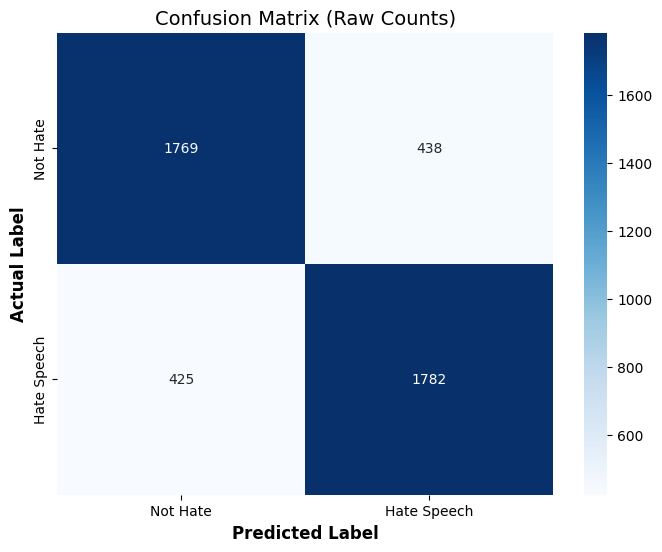

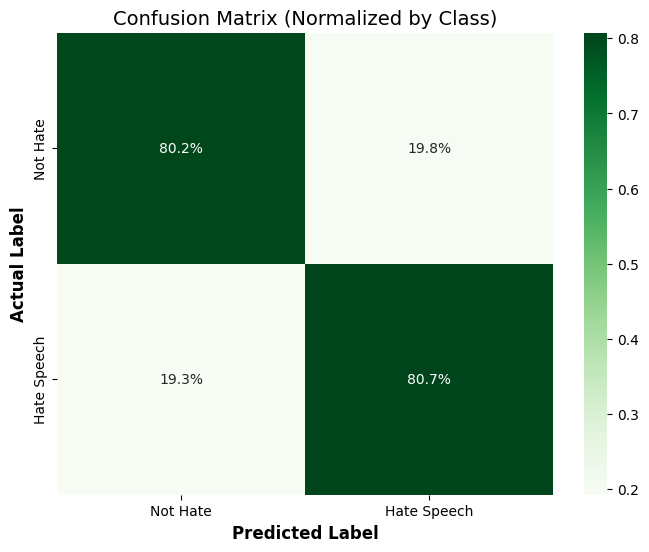

In [ ]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

print("Generating predictions for Confusion Matrix...")
predictions_output = trainer.predict(tokenized_eval)

y_preds = np.argmax(predictions_output.predictions, axis=1)
y_true = predictions_output.label_ids

cm = confusion_matrix(y_true, y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',            # 'd' means integer (raw counts)
    cmap='Blues',       # Blue color scheme
    xticklabels=['Not Hate', 'Hate Speech'],
    yticklabels=['Not Hate', 'Hate Speech']
)

plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix (Raw Counts)', fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.1%',          # Shows percentages (e.g., 92.5%)
    cmap='Greens',      # Green color scheme
    xticklabels=['Not Hate', 'Hate Speech'],
    yticklabels=['Not Hate', 'Hate Speech']
)

plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix (Normalized by Class)', fontsize=14)
plt.show()

# 9 parameters

In [ ]:
import torch
import pandas as pd
import io
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from google.colab import files

In [ ]:
# Setup Device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU.")

GPU not available, using CPU.


In [ ]:
# 1. Define Labels and Model

label2id = {"not_hate_speech": 0, "hate_speech": 1}
id2label = {0: "not_hate_speech", 1: "hate_speech"}

MODEL_NAME = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

In [ ]:
# 2. File Uploading and Data Loading
print("\nLoading and Preprocessing Data")

def upload_and_load_data(file_prompt="Please upload your training file (CSV or JSON)"):
    """
    Shows a file picker, reads the uploaded file into a pandas DataFrame,
    maps string labels to integers, and converts to a Hugging Face Dataset.
    """
    print(file_prompt)
    uploaded = files.upload()

    if not uploaded:
        raise ValueError("No file uploaded. Please run the cell again.")

    # Get the name of the first uploaded file
    file_name = next(iter(uploaded))

    print(f"Reading file: {file_name}")

    # Read the file into pandas
    try:
        if file_name.endswith('.csv'):
            # Assume UTF-8 encoding, change if necessary
            df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='utf-8')
        elif file_name.endswith('.json') or file_name.endswith('.jsonl'):
            df = pd.read_json(io.BytesIO(uploaded[file_name]), lines=True if file_name.endswith('.jsonl') else False)
        else:
            raise ValueError("Unsupported file format. Please upload a .csv or .json file.")
    except Exception as e:
        print(f"Error reading file: {e}")
        print("Please ensure your file is a valid CSV or JSON and check its encoding.")
        return None

    # --- IMPORTANT ---
    # Change these column names if yours are different
    TEXT_COLUMN = "text"
    LABEL_COLUMN = "label"

    if TEXT_COLUMN not in df.columns or LABEL_COLUMN not in df.columns:
        print(f"Error: Expected columns '{TEXT_COLUMN}' and '{LABEL_COLUMN}' not found.")
        print(f"Found columns: {df.columns.tolist()}")
        print("Please modify the 'TEXT_COLUMN' and 'LABEL_COLUMN' variables in this script.")
        return None

    # Map string labels to integers
    if df[LABEL_COLUMN].dtype == 'object':
        df['labels'] = df[LABEL_COLUMN].map(label2id)

        # Check if any labels failed to map (resulting in NaN)
        if df['labels'].isnull().any():
            print("Warning: Some labels in your file were not 'hate_speech' or 'not_hate_speech' and were ignored.")
            print("Please check your data for typos.")
            df = df.dropna(subset=['labels']) # Drop rows with bad labels

        df['labels'] = df['labels'].astype(int)
    else:
        # Assume labels are already 0 and 1
        print("Labels appear to be numeric. Assuming 0=not_hate_speech, 1=hate_speech.")
        df['labels'] = df[LABEL_COLUMN].astype(int)


    # Keep only the columns we need
    df = df[[TEXT_COLUMN, 'labels']]
    df = df.rename(columns={TEXT_COLUMN: "sentence"})

    # Convert pandas DataFrame to Hugging Face Dataset
    return Dataset.from_pandas(df)

# Load training and evaluation data
try:
    # Make sure these files are your NEW balanced ones (e.g., train_8k.csv)
    train_data = upload_and_load_data("Please upload your TRAINING file (e.g., train_8k.csv)")
    eval_data = upload_and_load_data("Please upload your EVALUATION/TEST file (e.g., test_2k.csv)")

    if train_data is None or eval_data is None:
        raise Exception("Data loading failed. Please check the error messages above and try again.")

    print("\nSample of loaded training data:")
    print(train_data[0])

except Exception as e:
    print(f"\nAn error occurred during data loading: {e}")
    print("Stopping execution.")


Loading and Preprocessing Data
Please upload your TRAINING file (e.g., train_8k.csv)


Saving balanced_training (2).csv to balanced_training (2).csv
Reading file: balanced_training (2).csv
Please upload your EVALUATION/TEST file (e.g., test_2k.csv)


Saving balanced_testing (2).csv to balanced_testing (2).csv
Reading file: balanced_testing (2).csv

Sample of loaded training data:
{'sentence': 'Bam Aquino, Kiko Pangilinan, genuine opposiiton bets gain most votes in my polling precinct at Bagumbong, Caloocan. \n\n#Eleksyon2025 https://t.co/D3z8TGnu4D', 'labels': 0}


In [ ]:
# 3. Tokenization

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_function(examples):
    return tokenizer(examples["sentence"], truncation=True, padding="max_length", max_length=128)

# Apply tokenization
tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_eval = eval_data.map(tokenize_function, batched=True)

# Set the format to PyTorch tensors
tokenized_train.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
tokenized_eval.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Map:   0%|          | 0/8746 [00:00<?, ? examples/s]

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

In [ ]:
# 4. Model Definition

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

print(f"\nModel loaded: {MODEL_NAME}")
print(f"Model configured for labels: {model.config.id2label}")

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded: cardiffnlp/twitter-xlm-roberta-base-sentiment
Model configured for labels: {0: 'not_hate_speech', 1: 'hate_speech'}


In [ ]:
# 5. Metrics Definition

def compute_metrics(p):
    """
    Calculates Accuracy, Macro P/R/F1, and Weighted P/R/F1.
    """
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    macro_precision = precision_score(labels, preds, average='macro', zero_division=0)
    macro_recall = recall_score(labels, preds, average='macro', zero_division=0)
    macro_f1 = f1_score(labels, preds, average='macro', zero_division=0)

    weighted_precision = precision_score(labels, preds, average='weighted', zero_division=0)
    weighted_recall = recall_score(labels, preds, average='weighted', zero_division=0)
    weighted_f1 = f1_score(labels, preds, average='weighted', zero_division=0)

    return {
        "accuracy": acc,
        "macro_f1": macro_f1,
        "macro_precision": macro_precision,
        "macro_recall": macro_recall,
        "weighted_f1": weighted_f1,
        "weighted_precision": weighted_precision,
        "weighted_recall": weighted_recall,
    }

In [ ]:
import torch
from transformers import TrainingArguments

# 6. Training Setup - MANUAL CONFIGURATION
MANUAL_LEARNING_RATE = 1e-5    # Recommended: 2e-5 to 5e-5
MANUAL_BATCH_SIZE = 16         # Recommended: 16 or 32 (16 is safer for memory)
MANUAL_EPOCHS = 3              # Recommended: 3 to 5
MANUAL_WEIGHT_DECAY = 0.05     # Recommended: 0.01 or 0.1 if there is overfitting
MANUAL_MAX_GRAD_NORM = 0.5
MANUAL_ADAM_EPSILON = 1e-7
MANUAL_GRAD_ACCUM_STEPS = 3
MANUAL_WARMUP_STEPS = 50
# ---------------------------

print(f"\nTraining with Manual Hyperparameters:")
print(f"LR: {MANUAL_LEARNING_RATE} | Batch: {MANUAL_BATCH_SIZE} | Epochs: {MANUAL_EPOCHS}")

training_args = TrainingArguments(
    output_dir="./results_final",

    # Manual Values
    learning_rate=MANUAL_LEARNING_RATE,
    per_device_train_batch_size=MANUAL_BATCH_SIZE,
    per_device_eval_batch_size=MANUAL_BATCH_SIZE,
    num_train_epochs=MANUAL_EPOCHS,
    weight_decay=MANUAL_WEIGHT_DECAY,

    # New Stability/Optimization Parameters
    max_grad_norm=MANUAL_MAX_GRAD_NORM,
    adam_epsilon=MANUAL_ADAM_EPSILON,
    gradient_accumulation_steps=MANUAL_GRAD_ACCUM_STEPS,
    warmup_steps=MANUAL_WARMUP_STEPS, # Use fixed steps for warmup

    # For Stability
    lr_scheduler_type="cosine",     # Smoothly lowers LR
    # warmup_ratio=0.1,             # Commented out, as it conflicts with warmup_steps
    label_smoothing_factor=0.1,     # Helps with generalization

    # Standard Args
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=torch.cuda.is_available(),
    report_to=[]
)


Training with Manual Hyperparameters:
LR: 1e-05 | Batch: 16 | Epochs: 3


In [ ]:
# 7. Trainer Initialization

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)] # Stops if validation worsens
)

/tmp/ipython-input-4239157477.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# 8. Start Training
print("\nStarting Training...")
trainer.train()


Starting Training...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Macro Precision,Macro Recall,Weighted F1,Weighted Precision,Weighted Recall
1,0.648400,0.544407,0.748754,0.746986,0.755908,0.748754,0.746986,0.755908,0.748754
2,0.526900,0.529840,0.761667,0.761253,0.763499,0.761667,0.761253,0.763499,0.761667


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# 9. Final Evaluation
print("\n Final Evaluation Results (from best model)  ")
eval_results = trainer.evaluate()
print(eval_results)

# Save the best model for inference
SAVED_MODEL_PATH = "./hate_speech_best_model"
trainer.save_model(SAVED_MODEL_PATH)
print(f"\nBest model saved to {SAVED_MODEL_PATH}")

In [ ]:
# 10. Inference on New Data
print("\nRunning Inference on Unlabeled Data ")

from transformers import pipeline

# 1. Create a prediction pipeline using the *saved* best model
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=SAVED_MODEL_PATH,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# 2. Define new text data
new_data = [
    "Ang mga kandidatong ito ay magnanakaw at hindi dapat iboto.", # Example (Hate Speech)
    "Mahalaga ang pagboto para sa kinabukasan ng ating bansa.", # Example (Not Hate Speech)
    "Wala sanang bobo ngayong election",
    "Simple rules hindi mai-apply ng mga filipino voters. Hindi na ako magtataka bakit bobong senador mga nauupo sa posisyon. ",
    "ang tanga naman ng mga voters hanggang ngayon. 2025 na oh. bobo pa rin"
]

# 3. Run Batch Inference
results = sentiment_analyzer(new_data)

# 4. Print Results
for text, result in zip(new_data, results):
    print(f"\nText: {text}")
    print(f"  Prediction: {result['label']} (Score: {result['score']:.4f})")

print("\n\nProcess complete.")

In [ ]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

print("Generating predictions for Confusion Matrix...")
predictions_output = trainer.predict(tokenized_eval)

y_preds = np.argmax(predictions_output.predictions, axis=1)
y_true = predictions_output.label_ids

cm = confusion_matrix(y_true, y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',            # 'd' means integer (raw counts)
    cmap='Blues',       # Blue color scheme
    xticklabels=['Not Hate', 'Hate Speech'],
    yticklabels=['Not Hate', 'Hate Speech']
)

plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix (Raw Counts)', fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.1%',          # Shows percentages (e.g., 92.5%)
    cmap='Greens',      # Green color scheme
    xticklabels=['Not Hate', 'Hate Speech'],
    yticklabels=['Not Hate', 'Hate Speech']
)

plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix (Normalized by Class)', fontsize=14)
plt.show()